In [36]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.ndimage

### Useful links
[PSL Interactive Maps](https://psl.noaa.gov/data/composites/day/)

In [82]:
# URL of the NOAA/NCAR reanalysis data on the THREDDS server
data_url = "http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc"

# Variable (temperature)
variable = "air"

# Specify the start and end months
end_date = "2023-08"
start_date = "2023-07"

In [83]:
# Open the dataset
ds = xr.open_dataset(data_url)

# Select the temperature variable and the desired time range for the last 30 days
temp_data_last_30_days = ds[variable].sel(time=slice(start_date, end_date))

In [84]:
# Calculate the monthly climatology for the same month(s) for each year between 1991 and 2020
climatology_end_dates = [f"{year}-08" for year in range(2012, 2023)]
climatology_start_dates = [f"{year}-07" for year in range(2012, 2023)]

temp_data_climatology = xr.concat(
    [
        ds[variable].sel(time=slice(start_date, end_date)).mean("time")
        for start_date, end_date in zip(climatology_start_dates, climatology_end_dates)
    ],
    dim="time",
)

In [88]:
# Calculate the anomaly by subtracting the climatology from the target month(s)
temperature_anomaly = temp_data_last_30_days.mean('time') - temp_data_climatology.mean('time')

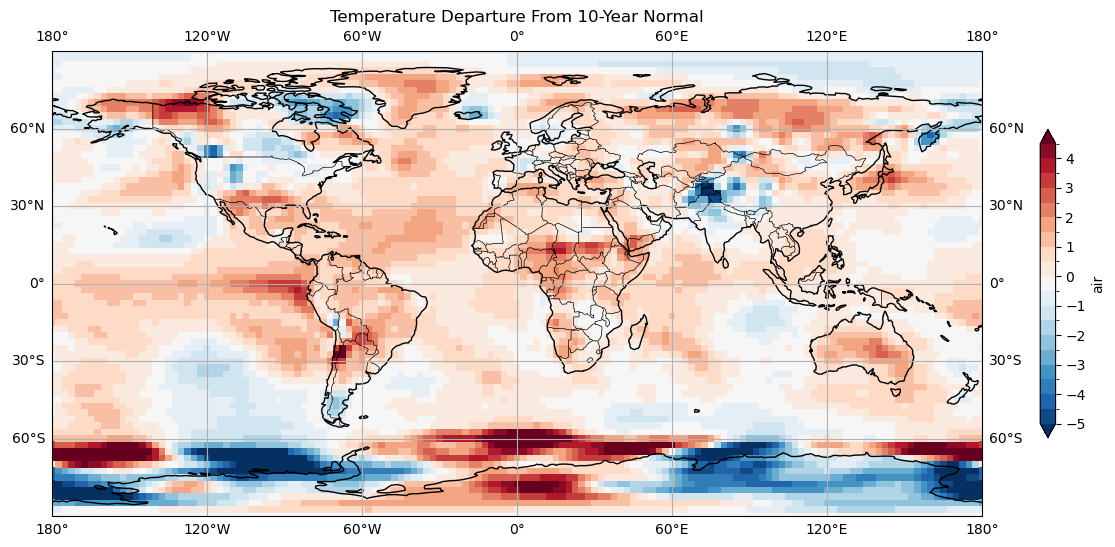

In [89]:
# Plot the temperature anomaly map
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="110m")
ax.add_feature(cfeature.BORDERS.with_scale('110m'), linewidth=0.5)
temperature_anomaly.plot(cbar_kwargs={"shrink": 0.4},
                         levels=[val for val in np.arange(-5, 5, 0.5)])
ax.gridlines(draw_labels=True)
ax.set_title(f"Temperature Departure From 10-Year Normal")
plt.show()
